### Problem statement


Lot of companies invest their time and money to hire and train new employees to increase their efficiency and effectiveness in their jobs. Still sometimes company has to face employee attrition, attrition can affect companies negatively. As it increases the hiring and other related expenses for an organization and regular employee turnover is also affected. To overcome this companies make some strategies to retain their top employees and here HR analytics comes into picture as it aims to provide insight into each process, so here we have to find out how does HR Analytics help in analyzing attrition?

In [63]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [172]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import pickle

In [65]:
#import dataset 
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [66]:
#view top few rows and transpose columns into rows 
df.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [67]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No null values are present. Most of the data type is integer, few columns are of object data type. Total entries/rows are 1470 and columns are 35

In [68]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Exploratory Data Analysis

In [69]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [70]:
#dropping column EmployeeCount, Over18, StandardHours  as  these columns have only 1 unique value and can'nt be of any use in prediction.
# Also employwe number is unique for each employee, dropping that too.
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'],inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


#### Univariate Analysis

In [71]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [72]:
#spliting the columns into two categories for further analysis
numerical_col=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_col=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime',]

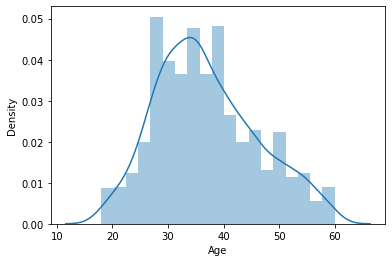

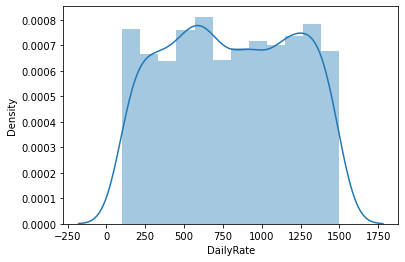

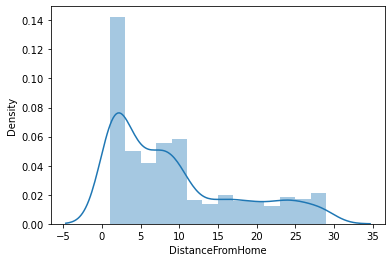

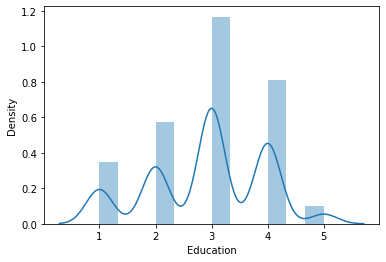

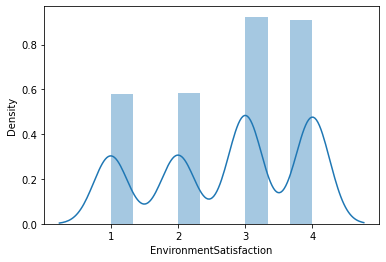

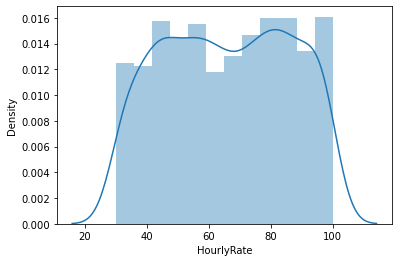

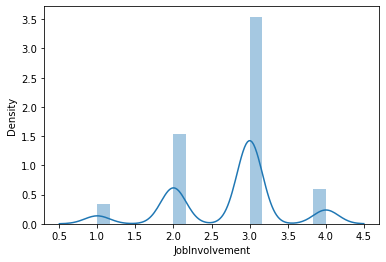

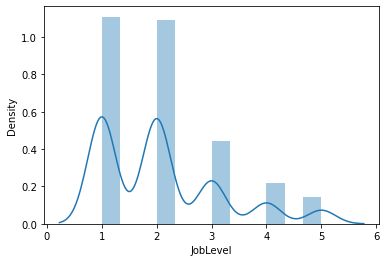

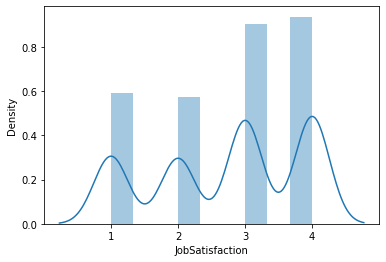

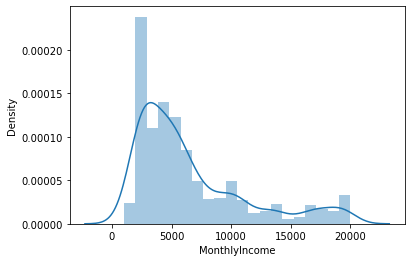

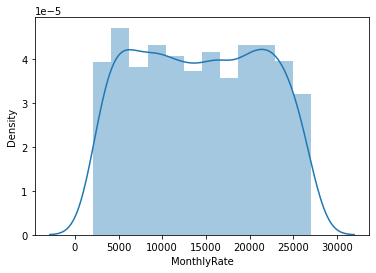

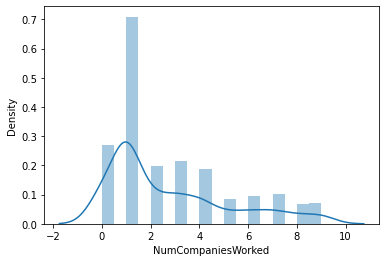

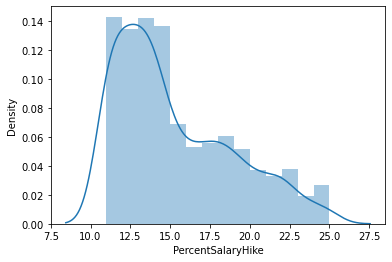

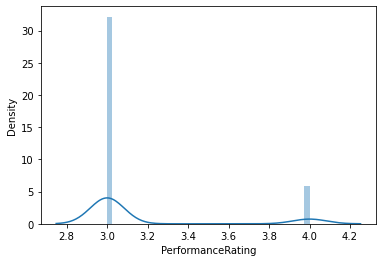

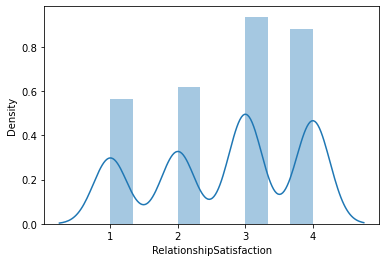

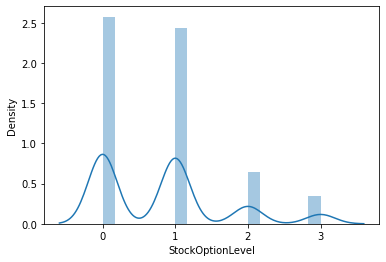

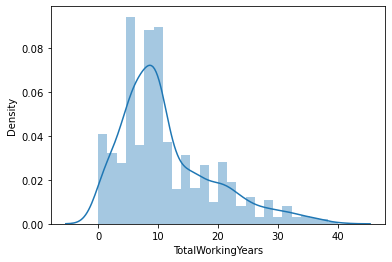

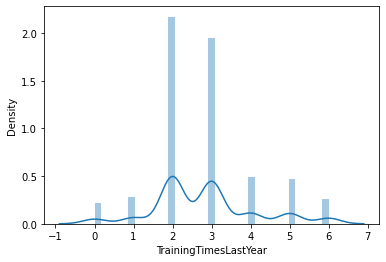

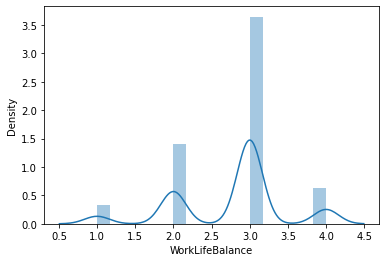

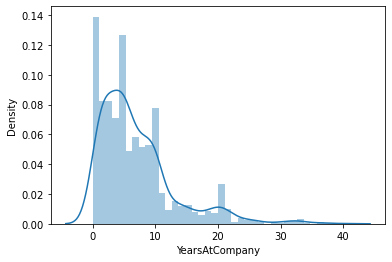

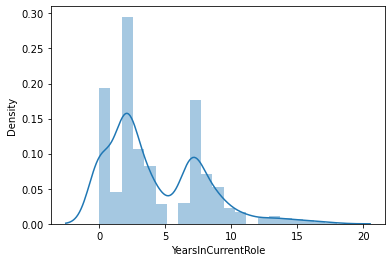

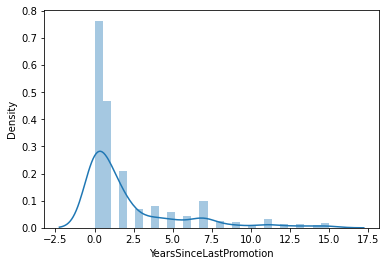

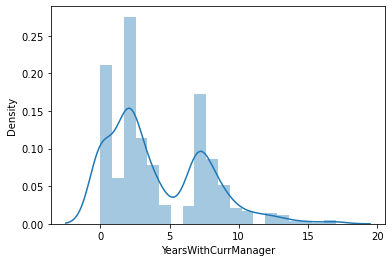

In [73]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

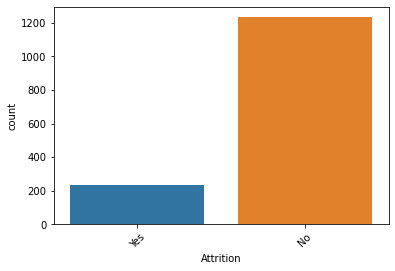

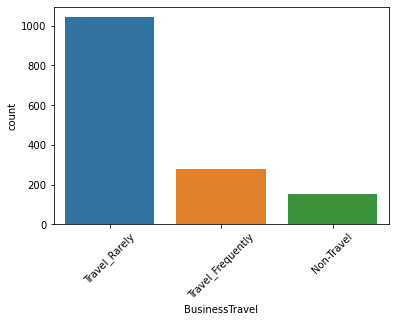

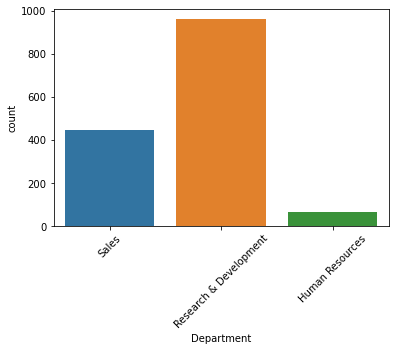

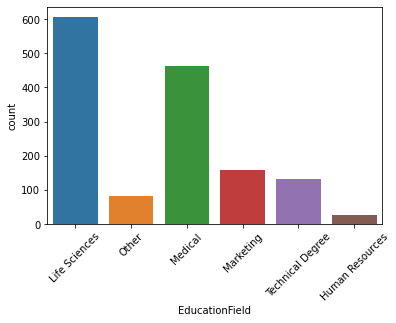

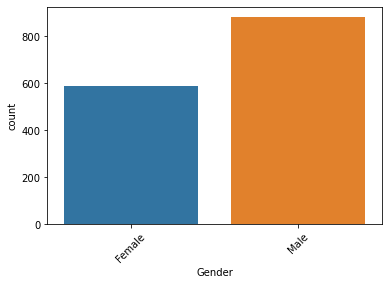

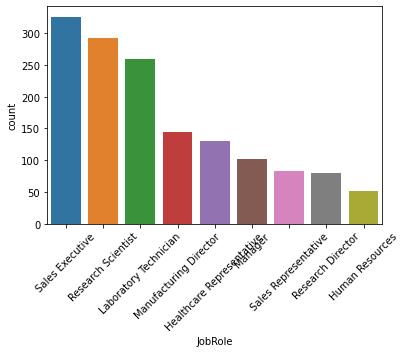

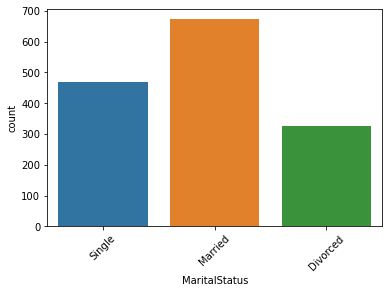

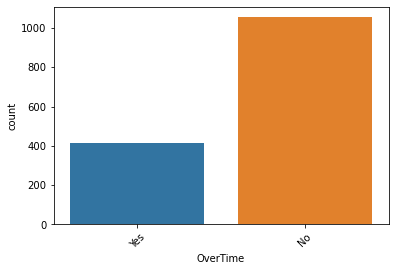

In [74]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis

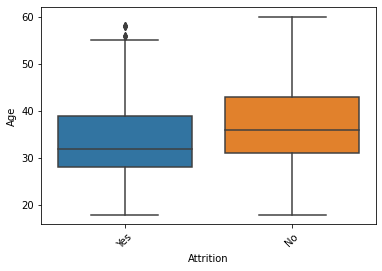

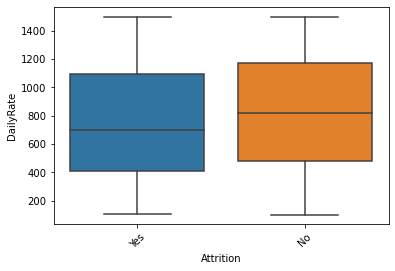

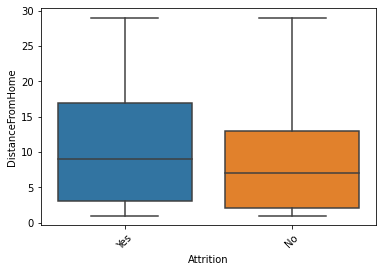

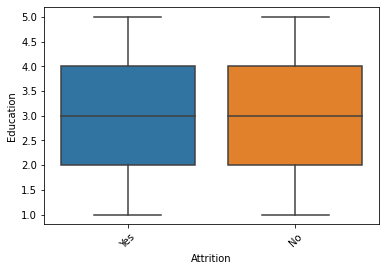

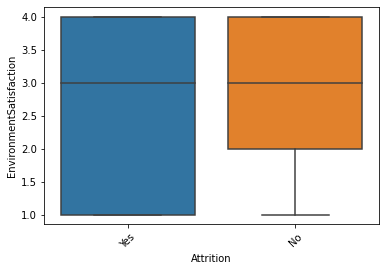

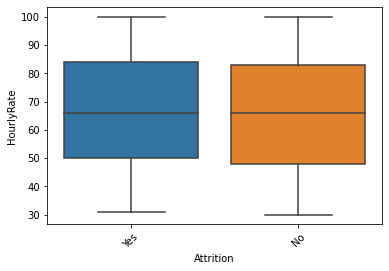

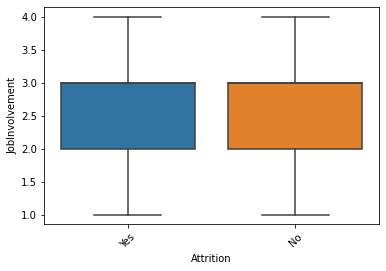

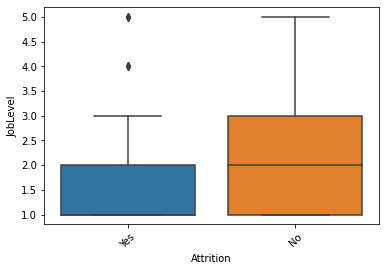

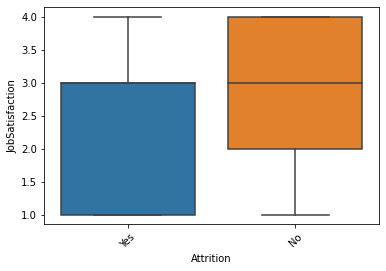

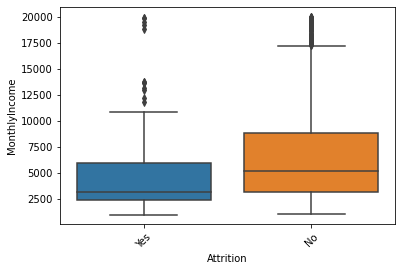

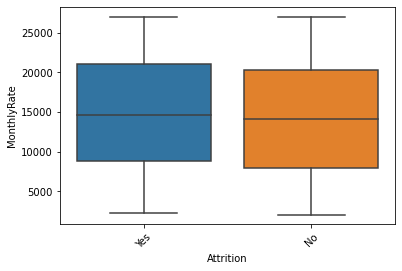

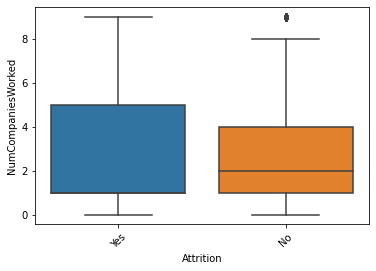

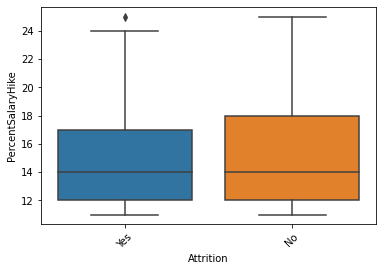

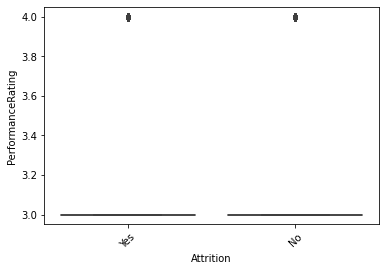

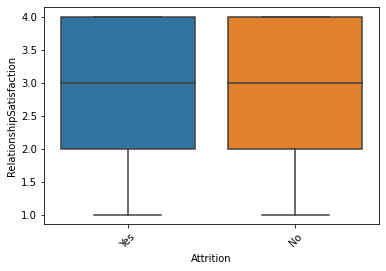

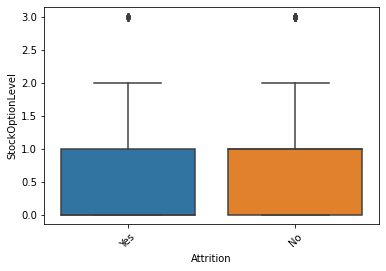

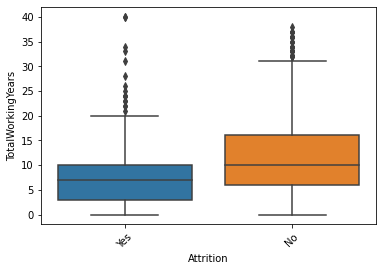

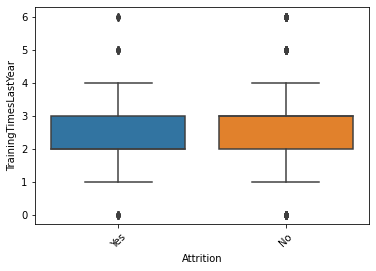

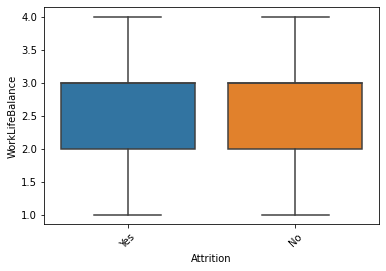

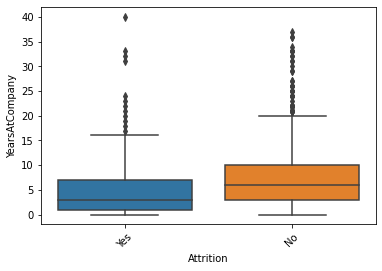

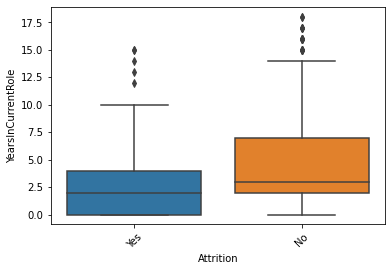

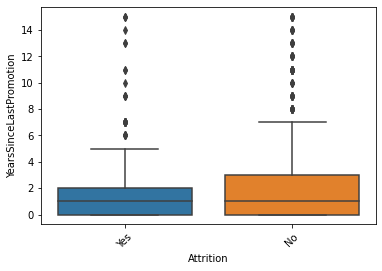

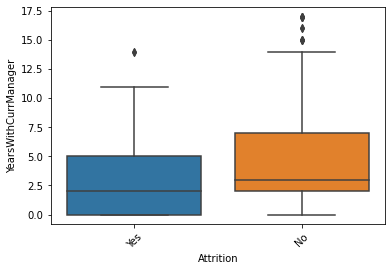

In [75]:
#For all numerical columns compare the value ranges for Attrition
for i in numerical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Attrition'],y=df[i])
    plt.xticks(rotation=45)
    plt.show()

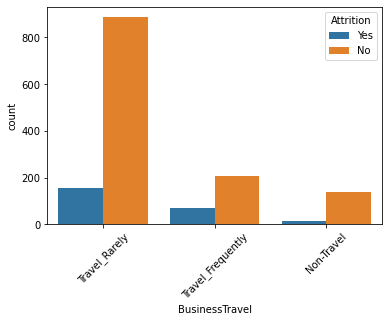

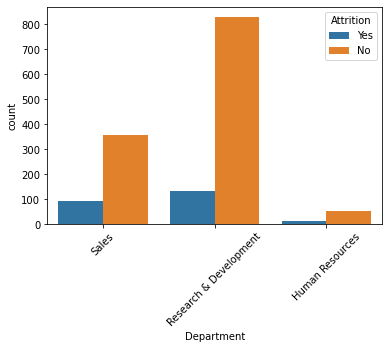

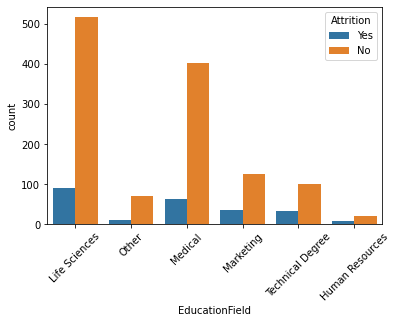

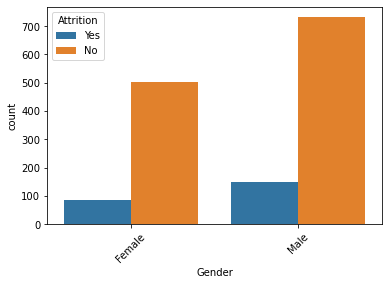

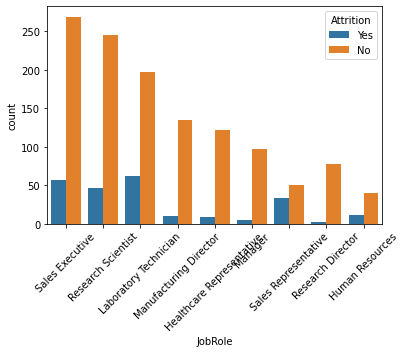

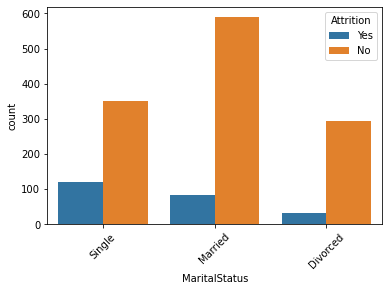

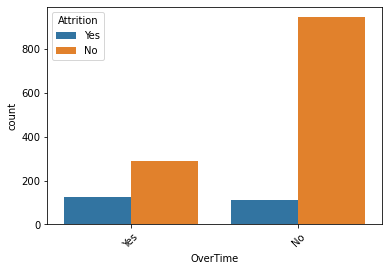

In [76]:
# for all categorical columns check how the Attrition vary
for i in categorical_col[1:]:
    sns.countplot(hue=df['Attrition'],x=df[i])
    plt.xticks(rotation=45)
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

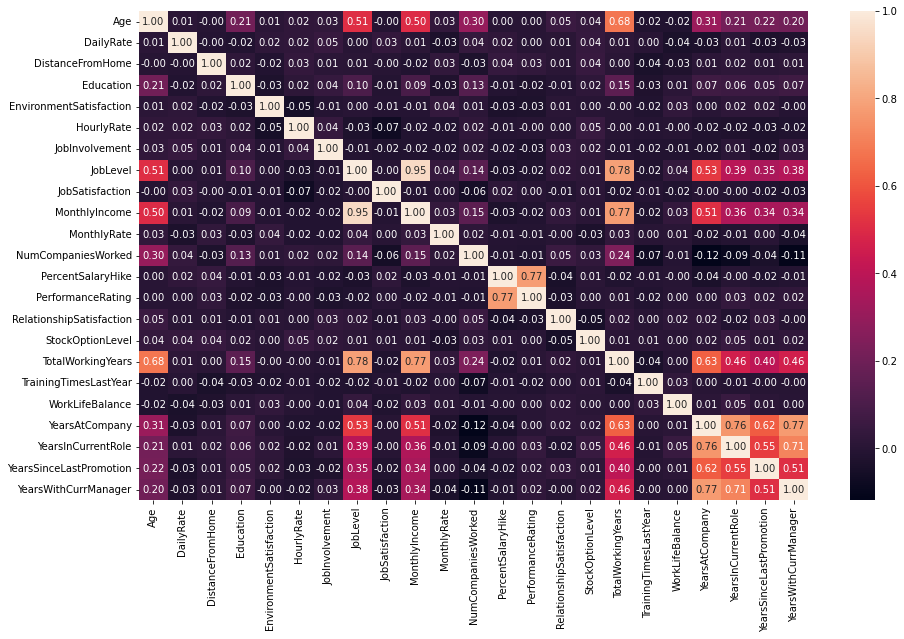

In [77]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True, fmt=".2f")

In [78]:
#dropping JobLevel column as it has a high positive correlation with other independent variable monthly income, so keeping one of them.
df.drop(columns=['JobLevel'],inplace=True)

### Feature Engineering

In [79]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [80]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [81]:
# converting Gender and OverTime columns value to 0 and 1
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['OverTime']=df['OverTime'].map({'No':0,'Yes':1})

In [82]:
#one hot encoding of the BusinessTravel column
dfBusinessTravel=pd.get_dummies(df['BusinessTravel'],prefix="BusinessTravel")
dfBusinessTravel

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
1465,0,1,0
1466,0,0,1
1467,0,0,1
1468,0,1,0


In [83]:
#one hot encoding of the Department column
dfDepartment=pd.get_dummies(df['Department'],prefix="Department")
dfDepartment

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


In [84]:
#one hot encoding of the EducationField column
dfEducationField=pd.get_dummies(df['EducationField'],prefix="EducationField")
dfEducationField

,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1465,0,0,0,1,0,0
1466,0,0,0,1,0,0
1467,0,1,0,0,0,0
1468,0,0,0,1,0,0


In [85]:
#one hot encoding of the JobRole column
dfJobRole=pd.get_dummies(df['JobRole'],prefix="JobRole")
dfJobRole

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1465,0,0,1,0,0,0,0,0,0
1466,1,0,0,0,0,0,0,0,0
1467,0,0,0,0,1,0,0,0,0
1468,0,0,0,0,0,0,0,1,0


In [86]:
#one hot encoding of the MaritalStatus column
dfMaritalStatus=pd.get_dummies(df['MaritalStatus'],prefix="MaritalStatus")
dfMaritalStatus

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,1,0


In [87]:
# Concatenate the original dataframe with dataframes created for BusinessTravel, Department, EducationField, JobRole, MaritalStatus values
df=pd.concat([df,dfBusinessTravel],axis=1)
df=pd.concat([df,dfDepartment],axis=1)
df=pd.concat([df,dfEducationField],axis=1)
df=pd.concat([df,dfJobRole],axis=1)
df=pd.concat([df,dfMaritalStatus],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,...,0,0,0,0,0,1,0,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,...,1,0,0,0,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,...,0,0,0,0,1,0,0,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,0,...,1,0,0,0,0,0,0,0,1,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,0,...,0,0,0,0,0,0,0,0,1,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,0,...,0,0,1,0,0,0,0,0,1,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,0,...,0,0,0,0,0,1,0,0,1,0


In [88]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technic

#### Check for correlation in the columns that were One-Hot-Encoded

In [89]:
ohe_cols=dfBusinessTravel.columns.tolist()+dfDepartment.columns.tolist()+dfEducationField.columns.tolist()+dfJobRole.columns.tolist()+dfMaritalStatus.columns.tolist()
ohe_cols

['BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

<AxesSubplot:>

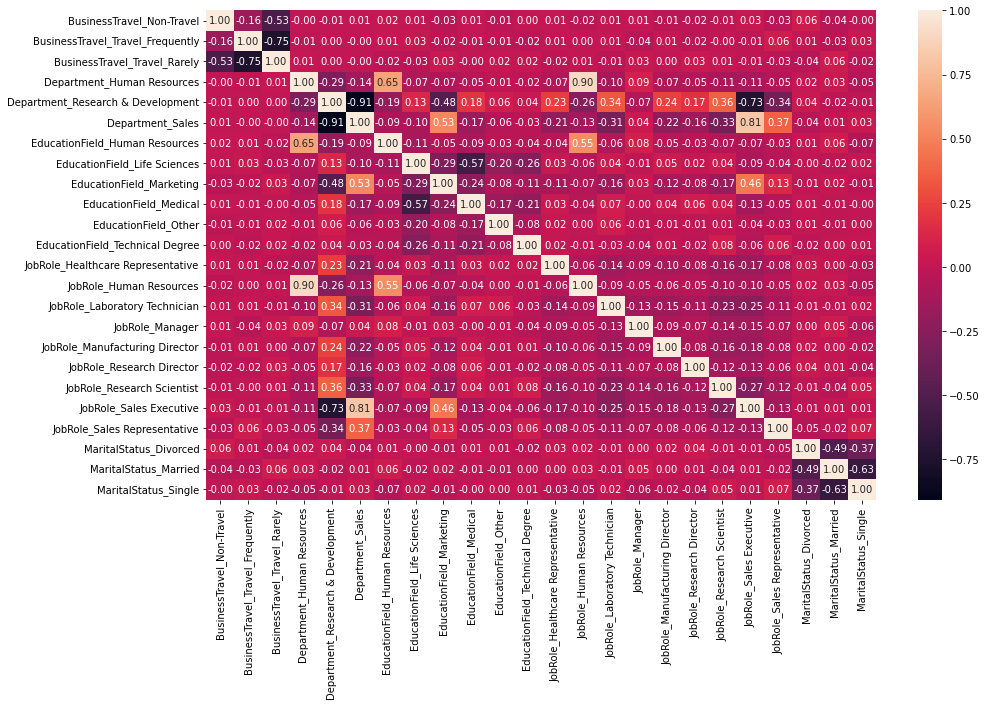

In [90]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df[ohe_cols].corr(),annot=True, fmt=".2f")

'JobRole_Human Resources' and 'Department_Human Resources' has a high positive correlation with each other.
'Department_Research & Development' and 'Department_Sales' has a high negative correlation with each other.

In [91]:
# Drop 'Department_Human Resources' and 'Department_Sales' column
df.drop(columns=['Department_Human Resources','Department_Sales'],inplace=True)

In [93]:
# Create X with all independent variable
X=df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']]
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,1,94,3,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,0,61,2,2,5130,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,0,92,2,3,2090,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,1,56,3,3,2909,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,0,40,3,2,3468,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,0,41,4,4,2571,...,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,0,42,2,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,0,87,4,2,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,0,63,2,2,5390,...,0,0,0,0,0,1,0,0,1,0


In [94]:
# Create y with only target variable(Attrition)
y=df["Attrition"]
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [95]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
45,inf,MaritalStatus_Single
36,inf,JobRole_Laboratory Technician
26,inf,BusinessTravel_Travel_Rarely
28,inf,EducationField_Human Resources
29,inf,EducationField_Life Sciences
30,inf,EducationField_Marketing
31,inf,EducationField_Medical
32,inf,EducationField_Other
33,inf,EducationField_Technical Degree
34,inf,JobRole_Healthcare Representative


In [96]:
# Drop MaritalStatus_Single as the VIF score is infinite
X.drop(columns=['MaritalStatus_Single'],inplace=True)

In [97]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
34,inf,JobRole_Healthcare Representative
36,inf,JobRole_Laboratory Technician
29,inf,EducationField_Life Sciences
30,inf,EducationField_Marketing
31,inf,EducationField_Medical
32,inf,EducationField_Other
33,inf,EducationField_Technical Degree
28,inf,EducationField_Human Resources
25,inf,BusinessTravel_Travel_Frequently
35,inf,JobRole_Human Resources


In [98]:
# Drop JobRole_Healthcare Representative as the VIF score is infinite
X.drop(columns=['JobRole_Healthcare Representative'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
25,inf,BusinessTravel_Travel_Frequently
32,inf,EducationField_Other
28,inf,EducationField_Human Resources
29,inf,EducationField_Life Sciences
30,inf,EducationField_Marketing
31,inf,EducationField_Medical
26,inf,BusinessTravel_Travel_Rarely
33,inf,EducationField_Technical Degree
24,inf,BusinessTravel_Non-Travel
27,14.095110,Department_Research & Development


In [99]:
# Drop BusinessTravel_Travel_Frequently as the VIF score is infinite
X.drop(columns=['BusinessTravel_Travel_Frequently'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
28,125.032777,EducationField_Life Sciences
30,96.433688,EducationField_Medical
29,33.576398,EducationField_Marketing
32,28.167780,EducationField_Technical Degree
31,17.976588,EducationField_Other
26,14.095110,Department_Research & Development
39,13.400590,JobRole_Sales Executive
9,8.384874,MonthlyIncome
27,6.557530,EducationField_Human Resources
40,5.180925,JobRole_Sales Representative


In [100]:
# Drop EducationField_Life Sciences as the VIF score is high
X.drop(columns=['EducationField_Life Sciences'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
14,141.946738,PerformanceRating
13,44.014000,PercentSalaryHike
0,34.591585,Age
26,32.168300,Department_Research & Development
9,23.370735,MonthlyIncome
19,15.857354,WorkLifeBalance
7,15.381149,JobInvolvement
17,14.791854,TotalWorkingYears
38,13.162482,JobRole_Sales Executive
6,11.339902,HourlyRate


In [101]:
# Drop PerformanceRating as the VIF score is high
X.drop(columns=['PerformanceRating'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
0,34.253201,Age
25,28.696171,Department_Research & Development
9,23.250356,MonthlyIncome
13,16.878089,PercentSalaryHike
18,15.469562,WorkLifeBalance
7,15.181239,JobInvolvement
16,14.780480,TotalWorkingYears
37,11.441590,JobRole_Sales Executive
6,11.137667,HourlyRate
19,10.860070,YearsAtCompany


In [102]:
# Drop Age as the VIF score is high
X.drop(columns=['Age'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
24,27.844701,Department_Research & Development
8,23.237701,MonthlyIncome
12,16.681713,PercentSalaryHike
17,15.444211,WorkLifeBalance
6,15.032984,JobInvolvement
15,11.215127,TotalWorkingYears
36,11.107350,JobRole_Sales Executive
5,11.067932,HourlyRate
18,10.833996,YearsAtCompany
2,9.266979,Education


In [103]:
# Drop Department_Research & Development as the VIF score is high
X.drop(columns=['Department_Research & Development'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
8,22.327679,MonthlyIncome
12,15.971313,PercentSalaryHike
17,14.998307,WorkLifeBalance
6,14.458217,JobInvolvement
15,11.170016,TotalWorkingYears
18,10.804972,YearsAtCompany
5,10.779540,HourlyRate
2,9.131144,Education
13,7.156906,RelationshipSatisfaction
3,7.037385,EnvironmentSatisfaction


In [104]:
# Drop MonthlyIncome as the VIF score is high
X.drop(columns=['MonthlyIncome'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
11,15.787763,PercentSalaryHike
16,14.794130,WorkLifeBalance
6,14.439685,JobInvolvement
17,10.736258,YearsAtCompany
5,10.718366,HourlyRate
2,9.117136,Education
14,8.579558,TotalWorkingYears
12,7.116649,RelationshipSatisfaction
3,6.996272,EnvironmentSatisfaction
7,6.740730,JobSatisfaction


In [105]:
# Drop PercentSalaryHike as the VIF score is high
X.drop(columns=['PercentSalaryHike'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
15,14.442427,WorkLifeBalance
6,14.220193,JobInvolvement
16,10.725647,YearsAtCompany
5,10.555563,HourlyRate
2,9.034304,Education
13,8.554537,TotalWorkingYears
11,7.095606,RelationshipSatisfaction
3,6.968029,EnvironmentSatisfaction
7,6.611654,JobSatisfaction
19,6.576649,YearsWithCurrManager


In [106]:
# Drop WorkLifeBalance as the VIF score is high
X.drop(columns=['WorkLifeBalance'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
6,13.969691,JobInvolvement
15,10.725646,YearsAtCompany
5,10.351425,HourlyRate
2,8.903979,Education
13,8.545364,TotalWorkingYears
11,7.000755,RelationshipSatisfaction
3,6.850643,EnvironmentSatisfaction
18,6.574626,YearsWithCurrManager
7,6.536947,JobSatisfaction
16,6.521662,YearsInCurrentRole


In [107]:
# Drop JobInvolvement as the VIF score is high
X.drop(columns=['JobInvolvement'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
14,10.699783,YearsAtCompany
5,9.987840,HourlyRate
2,8.670153,Education
12,8.538405,TotalWorkingYears
10,6.859102,RelationshipSatisfaction
3,6.770636,EnvironmentSatisfaction
17,6.528139,YearsWithCurrManager
15,6.515779,YearsInCurrentRole
6,6.452425,JobSatisfaction
13,5.507069,TrainingTimesLastYear


In [108]:
# Drop YearsAtCompany as the VIF score is high
X.drop(columns=['YearsAtCompany'],inplace=True)
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
5,9.986744,HourlyRate
2,8.668739,Education
12,7.342232,TotalWorkingYears
10,6.851261,RelationshipSatisfaction
3,6.770630,EnvironmentSatisfaction
6,6.447908,JobSatisfaction
14,5.598518,YearsInCurrentRole
13,5.503799,TrainingTimesLastYear
16,5.317455,YearsWithCurrManager
0,4.901240,DailyRate


Now, all the features have VIF score less than 10.

In [111]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.400000,0.490065,0.0,0.0,0.0,1.00,1.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
OverTime,1470.0,0.282993,0.450606,0.0,0.0,0.0,1.00,1.0


In [112]:
#Feature scaling of X
ss=StandardScaler()

In [113]:
# Apply standard scaler on only relevant columns
X[['DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobSatisfaction','MonthlyRate','NumCompaniesWorked','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]=ss.fit_transform(X[['DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobSatisfaction','MonthlyRate','NumCompaniesWorked','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']])
X

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
0,0.742527,-1.010909,-0.891688,-0.660531,1,1.383138,1.153254,0.726020,2.125136,1,...,0,0,0,0,0,0,1,0,0,0
1,-1.297775,-0.147150,-1.868426,0.254625,0,-0.240677,-0.660853,1.488876,-0.678049,0,...,0,0,0,0,0,1,0,0,0,1
2,1.414363,-0.887515,-0.891688,1.169781,0,1.284725,0.246200,-1.674841,1.324226,1,...,0,1,0,0,0,0,0,0,0,0
3,1.461466,-0.764121,1.061787,1.169781,1,-0.486709,0.246200,1.243211,-0.678049,1,...,0,0,0,0,0,1,0,0,0,1
4,-0.524295,-0.887515,-1.868426,-1.575686,0,-1.274014,-0.660853,0.325900,2.525591,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.202082,1.703764,-0.891688,0.254625,0,-1.224807,1.153254,-0.284329,0.523316,0,...,0,1,0,0,0,0,0,0,0,1
1466,-0.469754,-0.393938,-1.868426,1.169781,0,-1.175601,-1.567907,1.004010,0.523316,0,...,0,0,0,0,0,0,0,0,0,1
1467,-1.605183,-0.640727,0.085049,-0.660531,0,1.038693,-0.660853,-1.284418,-0.678049,1,...,0,0,0,1,0,0,0,0,0,1
1468,0.546677,-0.887515,0.085049,1.169781,0,-0.142264,-0.660853,-0.150393,-0.277594,0,...,0,0,0,0,0,0,1,0,0,1


In [114]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [115]:
# Oversampling the data as Attrition values are not balanced
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [116]:
y.value_counts()

Yes    1233
No     1233
Name: Attrition, dtype: int64

### Model Building

In [117]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [118]:
X_train

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
2146,0.537870,0.711820,1.061787,-0.625003,0,-1.181331,-0.660853,-0.318438,-0.485595,1,...,0,1,0,0,0,0,0,0,1,0
1786,-0.545520,-0.774263,-1.868426,0.179409,0,0.402377,-1.530631,-1.071705,-1.062048,0,...,0,0,0,0,0,0,0,0,0,0
1401,-1.520894,2.073946,1.061787,0.254625,0,0.251388,-0.660853,1.615925,0.523316,1,...,0,0,1,0,0,0,0,0,0,1
1024,-1.099446,-0.887515,1.061787,-1.575686,1,0.792660,0.246200,1.741288,0.122861,0,...,0,0,0,0,1,0,0,0,0,1
1907,1.505278,-0.472794,1.061787,0.254625,0,-0.618551,0.246200,-0.444051,-0.678049,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,-0.230557,-0.043765,0.903402,1.169781,0,0.961559,-1.420822,1.068127,0.057924,0,...,0,1,0,0,0,0,0,0,0,0
522,1.047456,0.099639,-0.891688,1.169781,0,0.694247,1.153254,0.129143,0.122861,0,...,0,0,0,0,0,1,0,0,0,0
2259,-0.345797,-1.002886,0.998274,-0.660531,1,-0.749952,0.275691,0.269075,-0.678049,0,...,0,0,0,0,0,0,0,1,0,0
1212,-0.308613,1.210187,0.085049,-0.660531,1,-1.520046,1.153254,0.846745,-0.678049,0,...,0,0,0,0,0,1,0,0,0,1


In [119]:
X_test

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married
1697,-1.194272,-0.023755,-0.072954,1.021739,0,0.382362,-0.047261,0.788556,-1.078504,1,...,0,0,0,0,0,1,0,0,0,0
85,1.481299,-0.270544,0.085049,1.169781,0,-0.831155,1.153254,1.037880,0.523316,0,...,0,0,0,1,0,0,0,0,0,0
1142,0.526845,-0.517332,2.038524,0.254625,1,-0.781948,-1.567907,1.283686,-0.678049,1,...,0,1,0,0,0,0,0,0,0,0
86,-0.648250,-0.887515,-1.868426,0.254625,0,-0.191470,-1.567907,-0.673908,0.122861,0,...,0,0,0,0,0,0,0,1,1,0
508,0.531803,-0.393938,1.061787,-0.660531,0,0.792660,1.153254,0.710420,-0.678049,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,0.493264,1.622626,0.085049,-0.614241,1,-1.074127,-1.522027,-0.373103,2.444570,0,...,0,0,0,0,0,0,0,0,0,0
279,-0.013600,-0.640727,-1.868426,-1.575686,0,1.481551,-0.660853,0.211078,0.122861,0,...,0,0,0,0,1,0,0,0,1,0
992,1.692023,1.950552,-0.891688,0.254625,0,0.251388,0.246200,-1.526851,0.122861,0,...,0,0,0,0,0,0,0,0,0,1
1218,0.286372,-0.393938,0.085049,1.169781,0,-1.520046,0.246200,0.218667,-0.678049,0,...,0,0,0,0,0,0,1,0,0,0


In [120]:
y_train

2146    Yes
1786    Yes
1401     No
1024     No
1907    Yes
       ... 
2051    Yes
522      No
2259    Yes
1212     No
1199     No
Name: Attrition, Length: 1849, dtype: object

In [121]:
y_test

1697    Yes
85       No
1142     No
86       No
508      No
       ... 
2344    Yes
279      No
992      No
1218     No
1229     No
Name: Attrition, Length: 617, dtype: object

#### Logistic Regression

In [122]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [126]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [127]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.8626284478096268

In [128]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array(['Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',


In [129]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[270,  51],
       [ 49, 247]], dtype=int64)

In [130]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8379254457050244

The accuracy value on train and test data is close to each other so there is not overfitting.

#### Random Forest

In [180]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [181]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [182]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [183]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
  

In [184]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[307,  14],
       [ 30, 266]], dtype=int64)

In [185]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.9286871961102107

The accuracy has improved on using Random forest but the train accuracy is 100% which means the model is overfitting.

#### Let's do RFE to use only limited number of features which would make the model less complex and would handle overfitting

In [232]:
rf=RandomForestClassifier()
rfe = RFE(rf, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [233]:
X_train_rfe=X_train[X_train.columns[rfe.support_].tolist()]
X_test_rfe=X_test[X_train.columns[rfe.support_].tolist()]

In [234]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train_rfe,y_train)

RandomForestClassifier()

In [235]:
#Predict on train data
y_train_pred=rf.predict(X_train_rfe)
y_train_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [236]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [237]:
# Predict on test data
y_test_pred=rf.predict(X_test_rfe)
y_test_pred

array(['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes'

In [238]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[290,  31],
       [ 46, 250]], dtype=int64)

In [239]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.8752025931928687

As we can see even if we use just 5 feature the model is still overfitting.Let's see if tuning the hyperparameter would reduce overfitting.

#### Hyperparameter tuning

In [306]:
# Hyperparameter tuning to maximize the accuracy on test data which would reduce the overfitting and will make the model generic and robust.
param_grid = {
    'bootstrap': [True],
    'max_depth': [9, 10, 11],
    'max_features': [0.4, 0.5, 0.6],
    'n_estimators': [120, 140, 160],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [307]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 1/5; 1/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.922 total time=   0.3s
[CV 2/5; 1/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 2/5; 1/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.903 total time=   0.2s
[CV 3/5; 1/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 3/5; 1/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.914 total time=   0.2s
[CV 4/5; 1/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_

[CV 5/5; 6/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=4, n_estimators=160;, score=0.897 total time=   0.4s
[CV 1/5; 7/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 1/5; 7/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.914 total time=   0.2s
[CV 2/5; 7/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 2/5; 7/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.897 total time=   0.2s
[CV 3/5; 7/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 3/5; 7/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.905 total 

[CV 4/5; 12/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=3, n_estimators=160;, score=0.889 total time=   0.3s
[CV 5/5; 12/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=3, n_estimators=160
[CV 5/5; 12/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=3, n_estimators=160;, score=0.881 total time=   0.3s
[CV 1/5; 13/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 1/5; 13/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.908 total time=   0.3s
[CV 2/5; 13/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 2/5; 13/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.905

[CV 3/5; 18/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160;, score=0.903 total time=   0.3s
[CV 4/5; 18/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160
[CV 4/5; 18/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160;, score=0.908 total time=   0.4s
[CV 5/5; 18/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160
[CV 5/5; 18/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160;, score=0.892 total time=   0.4s
[CV 1/5; 19/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120
[CV 1/5; 19/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120;, score=0.911

[CV 2/5; 24/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.903 total time=   0.4s
[CV 3/5; 24/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160
[CV 3/5; 24/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.897 total time=   0.4s
[CV 4/5; 24/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160
[CV 4/5; 24/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.903 total time=   0.4s
[CV 5/5; 24/243] START bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160
[CV 5/5; 24/243] END bootstrap=True, max_depth=9, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.894

[CV 1/5; 30/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.922 total time=   0.4s
[CV 2/5; 30/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 2/5; 30/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.916 total time=   0.4s
[CV 3/5; 30/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 3/5; 30/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.911 total time=   0.4s
[CV 4/5; 30/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 4/5; 30/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.897

[CV 5/5; 35/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=140;, score=0.897 total time=   0.6s
[CV 1/5; 36/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 1/5; 36/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.905 total time=   0.5s
[CV 2/5; 36/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 2/5; 36/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.914 total time=   0.5s
[CV 3/5; 36/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 3/5; 36/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.903

[CV 4/5; 41/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=140;, score=0.889 total time=   0.4s
[CV 5/5; 41/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=140
[CV 5/5; 41/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=140;, score=0.889 total time=   0.6s
[CV 1/5; 42/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 1/5; 42/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.911 total time=   0.9s
[CV 2/5; 42/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 2/5; 42/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.895

[CV 3/5; 47/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, score=0.900 total time=   0.4s
[CV 4/5; 47/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140
[CV 4/5; 47/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, score=0.903 total time=   0.4s
[CV 5/5; 47/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140
[CV 5/5; 47/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, score=0.886 total time=   0.4s
[CV 1/5; 48/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160
[CV 1/5; 48/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160;, score=0.914

[CV 2/5; 53/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.903 total time=   0.4s
[CV 3/5; 53/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140
[CV 3/5; 53/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.895 total time=   0.4s
[CV 4/5; 53/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140
[CV 4/5; 53/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.897 total time=   0.4s
[CV 5/5; 53/243] START bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140
[CV 5/5; 53/243] END bootstrap=True, max_depth=9, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.897

[CV 1/5; 59/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.916 total time=   0.4s
[CV 2/5; 59/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 2/5; 59/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.911 total time=   0.5s
[CV 3/5; 59/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 3/5; 59/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.903 total time=   0.5s
[CV 4/5; 59/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 4/5; 59/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.895

[CV 5/5; 64/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=120;, score=0.883 total time=   0.4s
[CV 1/5; 65/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 1/5; 65/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.900 total time=   0.5s
[CV 2/5; 65/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 2/5; 65/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.908 total time=   0.5s
[CV 3/5; 65/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 3/5; 65/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.900

[CV 4/5; 70/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=0.886 total time=   0.4s
[CV 5/5; 70/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=120
[CV 5/5; 70/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=0.886 total time=   0.3s
[CV 1/5; 71/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 1/5; 71/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.919 total time=   0.5s
[CV 2/5; 71/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 2/5; 71/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.908

[CV 3/5; 76/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120;, score=0.900 total time=   0.4s
[CV 4/5; 76/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120
[CV 4/5; 76/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120;, score=0.905 total time=   0.4s
[CV 5/5; 76/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120
[CV 5/5; 76/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120;, score=0.883 total time=   0.4s
[CV 1/5; 77/243] START bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140
[CV 1/5; 77/243] END bootstrap=True, max_depth=9, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140;, score=0.911

[CV 2/5; 82/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.919 total time=   0.3s
[CV 3/5; 82/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 3/5; 82/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.911 total time=   0.4s
[CV 4/5; 82/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 4/5; 82/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.914 total time=   0.3s
[CV 5/5; 82/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 5/5; 82/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, scor

[CV 1/5; 88/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.916 total time=   0.3s
[CV 2/5; 88/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 2/5; 88/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.892 total time=   0.3s
[CV 3/5; 88/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 3/5; 88/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.903 total time=   0.3s
[CV 4/5; 88/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 4/5; 88/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, scor

[CV 5/5; 93/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=3, n_estimators=160;, score=0.897 total time=   0.5s
[CV 1/5; 94/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 1/5; 94/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.905 total time=   0.3s
[CV 2/5; 94/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 2/5; 94/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.900 total time=   0.3s
[CV 3/5; 94/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 3/5; 94/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, scor

[CV 4/5; 99/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160;, score=0.914 total time=   0.5s
[CV 5/5; 99/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160
[CV 5/5; 99/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160;, score=0.905 total time=   0.5s
[CV 1/5; 100/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120
[CV 1/5; 100/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120;, score=0.911 total time=   0.4s
[CV 2/5; 100/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120
[CV 2/5; 100/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120;, 

[CV 3/5; 105/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.905 total time=   0.4s
[CV 4/5; 105/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160
[CV 4/5; 105/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.900 total time=   0.4s
[CV 5/5; 105/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160
[CV 5/5; 105/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.897 total time=   0.4s
[CV 1/5; 106/243] START bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=5, n_estimators=120
[CV 1/5; 106/243] END bootstrap=True, max_depth=10, max_features=0.4, min_samples_leaf=3, min_samples_split=5, n_estimators=120

[CV 2/5; 111/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.914 total time=   0.7s
[CV 3/5; 111/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 3/5; 111/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.908 total time=   0.6s
[CV 4/5; 111/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 4/5; 111/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.908 total time=   0.6s
[CV 5/5; 111/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 5/5; 111/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160

[CV 1/5; 117/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.927 total time=   0.6s
[CV 2/5; 117/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 2/5; 117/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.905 total time=   0.5s
[CV 3/5; 117/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 3/5; 117/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.908 total time=   0.6s
[CV 4/5; 117/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 4/5; 117/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160

[CV 5/5; 122/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=140;, score=0.897 total time=   0.5s
[CV 1/5; 123/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 1/5; 123/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.914 total time=   0.6s
[CV 2/5; 123/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 2/5; 123/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.905 total time=   0.7s
[CV 3/5; 123/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 3/5; 123/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160

[CV 4/5; 128/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, score=0.908 total time=   0.4s
[CV 5/5; 128/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140
[CV 5/5; 128/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, score=0.894 total time=   0.4s
[CV 1/5; 129/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160
[CV 1/5; 129/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160;, score=0.911 total time=   0.5s
[CV 2/5; 129/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160
[CV 2/5; 129/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160

[CV 3/5; 134/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.892 total time=   0.4s
[CV 4/5; 134/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140
[CV 4/5; 134/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.897 total time=   0.4s
[CV 5/5; 134/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140
[CV 5/5; 134/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.886 total time=   0.4s
[CV 1/5; 135/243] START bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=160
[CV 1/5; 135/243] END bootstrap=True, max_depth=10, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=160

[CV 2/5; 140/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.914 total time=   0.5s
[CV 3/5; 140/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 3/5; 140/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.905 total time=   0.6s
[CV 4/5; 140/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 4/5; 140/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.908 total time=   0.6s
[CV 5/5; 140/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 5/5; 140/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140

[CV 1/5; 146/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.916 total time=   0.6s
[CV 2/5; 146/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 2/5; 146/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.911 total time=   0.8s
[CV 3/5; 146/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 3/5; 146/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.911 total time=   0.6s
[CV 4/5; 146/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 4/5; 146/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140

[CV 5/5; 151/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=120;, score=0.894 total time=   0.4s
[CV 1/5; 152/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 1/5; 152/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.916 total time=   0.4s
[CV 2/5; 152/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 2/5; 152/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.919 total time=   0.5s
[CV 3/5; 152/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 3/5; 152/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140

[CV 4/5; 157/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120;, score=0.908 total time=   0.4s
[CV 5/5; 157/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120
[CV 5/5; 157/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120;, score=0.886 total time=   0.4s
[CV 1/5; 158/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140
[CV 1/5; 158/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140;, score=0.922 total time=   0.5s
[CV 2/5; 158/243] START bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140
[CV 2/5; 158/243] END bootstrap=True, max_depth=10, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140

[CV 3/5; 163/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.916 total time=   0.2s
[CV 4/5; 163/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 4/5; 163/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.916 total time=   0.3s
[CV 5/5; 163/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120
[CV 5/5; 163/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=120;, score=0.897 total time=   0.3s
[CV 1/5; 164/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=140
[CV 1/5; 164/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=3, n_estimators=140

[CV 2/5; 169/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.908 total time=   0.4s
[CV 3/5; 169/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 3/5; 169/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.911 total time=   0.3s
[CV 4/5; 169/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 4/5; 169/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120;, score=0.919 total time=   0.3s
[CV 5/5; 169/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120
[CV 5/5; 169/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=1, min_samples_split=5, n_estimators=120

[CV 1/5; 175/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.916 total time=   0.3s
[CV 2/5; 175/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 2/5; 175/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.916 total time=   0.3s
[CV 3/5; 175/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 3/5; 175/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120;, score=0.900 total time=   0.3s
[CV 4/5; 175/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120
[CV 4/5; 175/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=4, n_estimators=120

[CV 5/5; 180/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=2, min_samples_split=5, n_estimators=160;, score=0.905 total time=   0.4s
[CV 1/5; 181/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120
[CV 1/5; 181/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120;, score=0.922 total time=   0.3s
[CV 2/5; 181/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120
[CV 2/5; 181/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120;, score=0.924 total time=   0.3s
[CV 3/5; 181/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120
[CV 3/5; 181/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=3, n_estimators=120

[CV 4/5; 186/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.914 total time=   0.4s
[CV 5/5; 186/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160
[CV 5/5; 186/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=4, n_estimators=160;, score=0.894 total time=   0.4s
[CV 1/5; 187/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=5, n_estimators=120
[CV 1/5; 187/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=5, n_estimators=120;, score=0.916 total time=   0.3s
[CV 2/5; 187/243] START bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=5, n_estimators=120
[CV 2/5; 187/243] END bootstrap=True, max_depth=11, max_features=0.4, min_samples_leaf=3, min_samples_split=5, n_estimators=120

[CV 3/5; 192/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.905 total time=   0.5s
[CV 4/5; 192/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 4/5; 192/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.908 total time=   0.5s
[CV 5/5; 192/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160
[CV 5/5; 192/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=3, n_estimators=160;, score=0.897 total time=   0.5s
[CV 1/5; 193/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=120
[CV 1/5; 193/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=120

[CV 2/5; 198/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.916 total time=   0.5s
[CV 3/5; 198/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 3/5; 198/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.903 total time=   0.5s
[CV 4/5; 198/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 4/5; 198/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160;, score=0.916 total time=   0.6s
[CV 5/5; 198/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160
[CV 5/5; 198/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=1, min_samples_split=5, n_estimators=160

[CV 1/5; 204/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.905 total time=   0.6s
[CV 2/5; 204/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 2/5; 204/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.911 total time=   0.5s
[CV 3/5; 204/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 3/5; 204/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160;, score=0.903 total time=   0.5s
[CV 4/5; 204/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160
[CV 4/5; 204/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=2, min_samples_split=4, n_estimators=160

[CV 5/5; 209/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=140;, score=0.902 total time=   0.4s
[CV 1/5; 210/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160
[CV 1/5; 210/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160;, score=0.911 total time=   0.5s
[CV 2/5; 210/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160
[CV 2/5; 210/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160;, score=0.905 total time=   0.5s
[CV 3/5; 210/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160
[CV 3/5; 210/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=3, n_estimators=160

[CV 4/5; 215/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.916 total time=   0.4s
[CV 5/5; 215/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140
[CV 5/5; 215/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=140;, score=0.889 total time=   0.4s
[CV 1/5; 216/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=160
[CV 1/5; 216/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=160;, score=0.914 total time=   0.4s
[CV 2/5; 216/243] START bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=160
[CV 2/5; 216/243] END bootstrap=True, max_depth=11, max_features=0.5, min_samples_leaf=3, min_samples_split=5, n_estimators=160

[CV 3/5; 221/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.914 total time=   0.6s
[CV 4/5; 221/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 4/5; 221/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.908 total time=   0.6s
[CV 5/5; 221/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140
[CV 5/5; 221/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=140;, score=0.894 total time=   0.6s
[CV 1/5; 222/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=160
[CV 1/5; 222/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=160

[CV 2/5; 227/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.914 total time=   0.6s
[CV 3/5; 227/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 3/5; 227/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.903 total time=   0.5s
[CV 4/5; 227/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 4/5; 227/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140;, score=0.914 total time=   0.5s
[CV 5/5; 227/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140
[CV 5/5; 227/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=3, n_estimators=140

[CV 1/5; 233/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.916 total time=   0.5s
[CV 2/5; 233/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 2/5; 233/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.900 total time=   0.5s
[CV 3/5; 233/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 3/5; 233/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140;, score=0.903 total time=   0.4s
[CV 4/5; 233/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140
[CV 4/5; 233/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=2, min_samples_split=5, n_estimators=140

[CV 5/5; 238/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=120;, score=0.892 total time=   0.4s
[CV 1/5; 239/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140
[CV 1/5; 239/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140;, score=0.916 total time=   0.5s
[CV 2/5; 239/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140
[CV 2/5; 239/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140;, score=0.900 total time=   0.4s
[CV 3/5; 239/243] START bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140
[CV 3/5; 239/243] END bootstrap=True, max_depth=11, max_features=0.6, min_samples_leaf=3, min_samples_split=4, n_estimators=140

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [9, 10, 11],
                         'max_features': [0.4, 0.5, 0.6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [120, 140, 160]},
             verbose=10)

In [308]:
best_params=grid_search.best_params_
print(best_params)

{'bootstrap': True, 'max_depth': 11, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 160}


In [315]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_features=0.4, min_samples_split=4,
                       n_estimators=160)

In [316]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [317]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.9940508382909681

In [318]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array(['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
   

In [319]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[302,  19],
       [ 36, 260]], dtype=int64)

In [320]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.9108589951377634

#### After doing hyperparameter tuning we can see the train accuracy has dropped to 99% and also the test accuracy has dropped to 91%. Still there is overfitting but its better than the model which has train accuracy of 100%.

In [321]:
# Saving the best model
pickle.dump(rf, open('model_hr_analytics.pkl', 'wb'))